In [1]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal
import scipy 
import scipy.stats as st
from scipy.stats import kurtosis

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

import networkx as nx
import community.community_louvain as community_louvain # pip install community

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

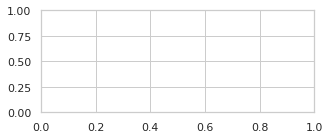

In [4]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/lpf.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [5]:
rsq=np.array([0.24205416850966,
             0.38348641665523975,0.38348641665523975,0.4064829597057922,0.45311169229618875,
             0.4826627957203161,0.5635516377812952, 0.5769321356148331,0.6394535507195294,
             0.6611420518231501,0.6602473760004987,0.7008459671212011,0.682043273913716])
rsq1=np.array([0.6203130980463978,0.3745363995992592,0.327073395020676, 0.2814948909942232,
              0.24205416850966])

cutoff=[2,4,6,8,10,15,20,40,50,60,70,80,90]
cutoff1=np.array([0.1,0.2,0.5,1,2])

ax=layout.axes[('fig1','lpf')]
ax.plot(cutoff,rsq,c='b',rasterized=True, linewidth=0.6)
ax.scatter(cutoff,rsq,c='orange',s=4,rasterized=True)
ax.set_xlim(1.6,)

ax.grid(False)

ax.set_rasterization_zorder(-20)

ax.set_xlabel('Cutoff Frequency (hz)')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('$R^2$',rotation=0)
ax.yaxis.set_label_coords(-0.06, 0.45)


mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={}, 
                            smart_bounds=True,
                            xticks=[2,6,10,15,20,40,60,70,80,90],
#                             yticks = [-0.01,0.01],
                            linewidth=0.5)

# ax.set_xticklabels(cutoff,rotation=90)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/lpf.svg')